<a href="https://colab.research.google.com/github/ishanjainofficial/ouyang-project/blob/master/VolumeTracings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data

In [23]:
from google.colab import files
files.upload()

Saving 0XD0DC210BA3C1C9.avi to 0XD0DC210BA3C1C9.avi


{'0XD0DC210BA3C1C9.avi': b'RIFF\x90\xb0\x11\x00AVI LIST\xec\x11\x00\x00hdrlavih8\x00\x00\x00 N\x00\x00\x00[\x0e\x00\x00\x00\x00\x00\x10\t\x00\x00\x95\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x10\x00\xe0\x00\x00\x00p\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00LIST\x94\x10\x00\x00strlstrh8\x00\x00\x00vidsMJPG\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x002\x00\x00\x00\x00\x00\x00\x00\x95\x00\x00\x00\x87\x1f\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x00p\x00strf(\x00\x00\x00(\x00\x00\x00\xe0\x00\x00\x00p\x00\x00\x00\x01\x00\x18\x00MJPG\x00&\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00JUNK\x18\x10\x00\x00\x04\x00\x00\x00\x00\x00\x00\x0000dc\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

# Mount Drive

In [175]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Generating Image Samples

In [24]:
from google.colab.patches import cv2_imshow

In [26]:
import cv2

videopath = "/content/0XD0DC210BA3C1C9.avi"

cap= cv2.VideoCapture(videopath)

i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('frame'+str(i)+'.png',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()


# Insert mask code

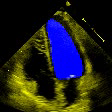

-1

In [27]:
import numpy as np
import cv2
from PIL import Image

image = "frame114.png"
# original = Image.open(test_image)

# width, height = original.size

image = cv2.imread(image)
y=0
x=0
h=112
w=112
crop = image[y:y+h, x:x+w]
cv2_imshow(crop)

cv2.imwrite("image.png", crop)

cv2.waitKey(0)

# Get all of the coordinates of the edge of the segmented mask

Number of Points:  10


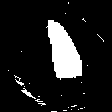

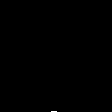

In [29]:
import cv2
import numpy as np

# read image
img = cv2.imread('image.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower and upper bounds
lower = (0,60,180)
upper = (255,255,255)

thresh = cv2.inRange(hsv, lower, upper) #setting thresholds

# get contours
result = np.zeros_like(img)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]
cv2.drawContours(result, [cntr], 0, (255,255,255), 1)

print('Number of Points: ', len(cntr))

points = []
# list contour points
for pt in cntr:
  for i in pt:
    points.append(i)

# show thresh and contour
cv2_imshow(thresh)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Finding maximum distance between points

In [15]:
import itertools, math

distance = 0
x1, x2, y1, y2 = 0, 0, 0, 0

for p1,p2 in itertools.combinations(points,2):
  latest_distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
  if latest_distance > distance:
    distance = latest_distance

    x1=p1[0]
    x2=p2[0]
    y1=p1[1]
    y2=p2[1]

print("Max distance: ", distance)
print(x1)
print(x2)
print(y1)
print(y2)


Max distance:  52.354560450833695
44
69
25
71


# Calculate weighted average

In [16]:
import math

parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([math.ceil(x_perpendicular), math.ceil(y_perpendicular)])

print(weighted_avg)

[[68, 69], [67, 67], [66, 65], [65, 63], [64, 61], [62, 58], [61, 56], [60, 54], [59, 52], [58, 50], [56, 47], [55, 45], [54, 43], [53, 41], [52, 39], [50, 36], [49, 34], [48, 32], [47, 30], [46, 28]]


# Draw a line given slope and intercept coordinates

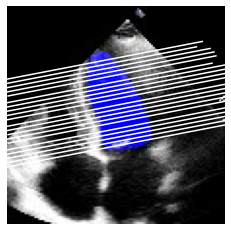

In [17]:
import matplotlib.pyplot as plt
import random

image = Image.open("image.png")

def find_second_point(slope, x0, y0):
    # this function returns a point which belongs to the line that has the slope 
    # inserted by the user and that intercepts the point (x0,y0) inserted by the user
    q = y0 - (slope*x0)  # calculate q
    new_x1 = x0 + random.randint(x0,x0+10)  
    new_y1 = (slope*new_x1) + q  
    new_x2 = x0 - random.randint(x0,x0+10)  
    new_y2 = (slope*new_x2) + q

    return new_x1, new_y1, new_x2, new_y2   


perp_slope = -0.1929824561403509
for i in weighted_avg:
  x_intercept = i[0]
  y_intercept = i[1]

  new_x1, new_y1,new_x2, new_y2 = find_second_point(perp_slope , x_intercept, y_intercept)

  plt.plot((new_x2, new_x1),(new_y2, new_y1), c='w')
  plt.axis('off')
  plt.imshow(image)

plt.savefig('lined.png', transparent=True, bbox_inches='tight', pad_inches = 0)

In [18]:
import PIL
from PIL import Image

image = PIL.Image.open("image.png")

width, height = image.size

basewidth = width
img = Image.open("lined.png")

wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("resized_image.png")

# Create transparent crop

In [19]:
import cv2
import numpy as np

image = cv2.imread('resized_image.png', -1)

mask = np.zeros(image.shape, dtype=np.uint8)
roi_corners = np.array([points], dtype=np.int32)

channel_count = image.shape[2]  # i.e. 3 or 4 depending on your image
ignore_mask_color = (255,)*channel_count
cv2.fillPoly(mask, roi_corners, ignore_mask_color)

# apply the mask
masked_image = cv2.bitwise_and(image, mask)

# save the result
cv2.imwrite('image_masked.png', masked_image)

True

# Combine both images

In [20]:
from PIL import Image

import numpy as np

img = Image.open("image_masked.png")

background = Image.open("image.png")

background.paste(img, (0, 0), img)
background.save('final.png',"PNG")

# Draw final max line

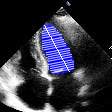

In [21]:
image = cv2.imread('final.png') 

height = image.shape[0]
width = image.shape[1]

cv2.line(image, (x1,y1), (x2,y2), (255, 255, 255), 1)
print()
cv2_imshow(image)

cv2.imwrite("output.png", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Enlarge Image

In [22]:
import cv2, numpy

original_image = cv2.imread('output.png',0)
original_height, original_width = original_image.shape[:2]
factor = 2
resized_image = cv2.resize(original_image, (int(original_height*factor), int(original_width*factor)), interpolation=cv2.INTER_CUBIC )

cv2.imwrite('output.png',resized_image)
#fixed var name

True